In [1]:
import pandas as pd
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)

In [7]:
import zipfile
zf = zipfile.ZipFile('../data/sfo/flight-delays.zip') 
df = pd.read_csv(zf.open('flights.csv'),
    dtype={"ORIGIN_AIRPORT": str, "DESTINATION_AIRPORT": str})
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Cleaning - leave only SFO
df.drop(df[(df['ORIGIN_AIRPORT'] != 'SFO') & (df['DESTINATION_AIRPORT'] != 'SFO')].index, inplace=True)

In [9]:
# Convert to date series
df = df.assign(Date=pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']]))
df.set_index(['Date'],inplace=True)
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,2015,12,31,4,OO,6376,N494CA,SFO,MRY,2330,...,2356.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,342,N27213,SFO,ATL,2330,...,710.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,1204,N476UA,SFO,IAH,2343,...,459.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,235,N81449,HNL,SFO,2350,...,710.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,1796,N21108,SFO,EWR,2354,...,750.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'], dtype=object)

In [13]:
new_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'Origin', 'Dest',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DepDelay',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ArrDelay', 'Diverted',
       'Cancelled', 'CancellationCode', 'NASDelay',
       'SecurityDelay', 'CarrierDelay', 'LateAircraftDelay',
       'WeatherDelay']

In [14]:
#Cleaning - rename columns to correspond to 1997-2009 stats
df.columns=new_columns
df.tail()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ArrDelay,Diverted,Cancelled,CancellationCode,NASDelay,SecurityDelay,CarrierDelay,LateAircraftDelay,WeatherDelay
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,2015,12,31,4,OO,6376,N494CA,SFO,MRY,2330,...,2356.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,342,N27213,SFO,ATL,2330,...,710.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,1204,N476UA,SFO,IAH,2343,...,459.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,235,N81449,HNL,SFO,2350,...,710.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,2015,12,31,4,UA,1796,N21108,SFO,EWR,2354,...,750.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


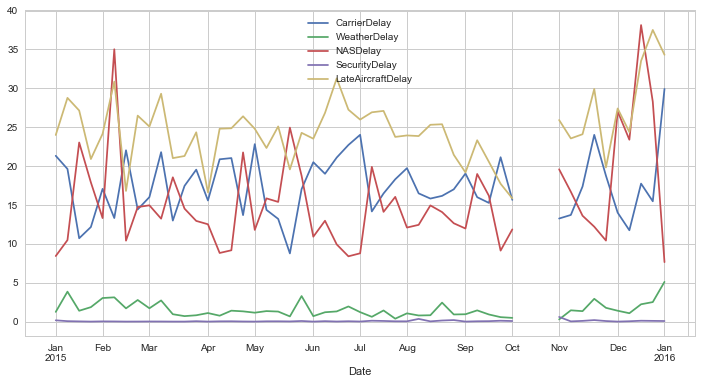

In [30]:
sns.set(style="whitegrid", color_codes=True)
df[['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].resample('W').mean().plot(figsize=(12,6))

In [19]:
delays = df[['ArrDelay','DepDelay','CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].resample('W').mean()
delays.insert(delays.shape[1],'row_count', delays.index.value_counts().sort_index().cumsum())
delays.tail()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,row_count
Date,,,,,,,,
2015-12-06,7.868634,14.594697,14.007391,1.395418,27.033999,0.000000,27.405026,49
2015-12-13,10.045720,14.471890,11.741600,1.073305,23.386683,0.042761,24.370189,50
2015-12-20,22.252888,27.142103,17.740157,2.224672,38.130709,0.109711,33.522835,51
2015-12-27,29.947430,33.290682,15.469884,2.506601,28.270627,0.091172,37.504950,52
2016-01-03,15.795647,24.341312,29.915663,5.104418,7.646586,0.071285,34.312249,53


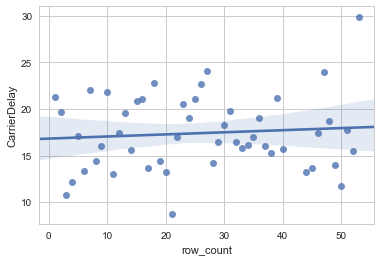

In [31]:
# Regression line for time series
fig = sns.regplot(x="row_count", y="CarrierDelay", data=delays)

In [21]:
# Change x-ticks to dates
ls = [item.get_text() for item in fig.get_xticklabels()]
print ls

labels = []
for x in ls:
    if x != '':
        labels.append(delays.index[int(x, 10)].strftime('%b %Y'))
    else:
        labels.append('')
print labels


[u'', u'0', u'10', u'20', u'30', u'40', u'50', u'']
['', 'Jan 2015', 'Mar 2015', 'May 2015', 'Aug 2015', 'Oct 2015', 'Dec 2015', '']


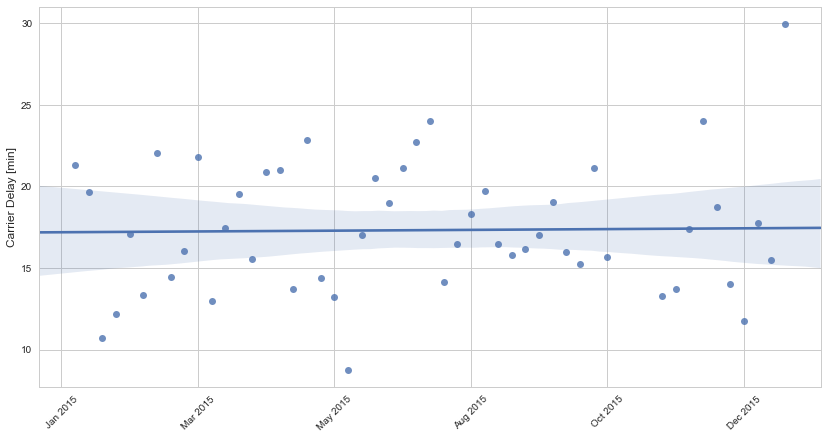

In [32]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(x="row_count", y="CarrierDelay", data=delays, ax=ax, robust=True)
ax.set_xticklabels(labels)
plt.xticks(rotation = 45)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Carrier Delay [min]", fontsize=12)
plt.show()        

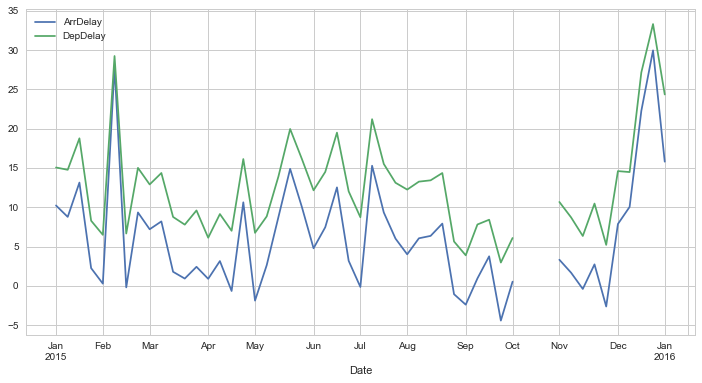

In [33]:
df[['ArrDelay', 'DepDelay']].resample('W').mean().plot(figsize=(12,6))

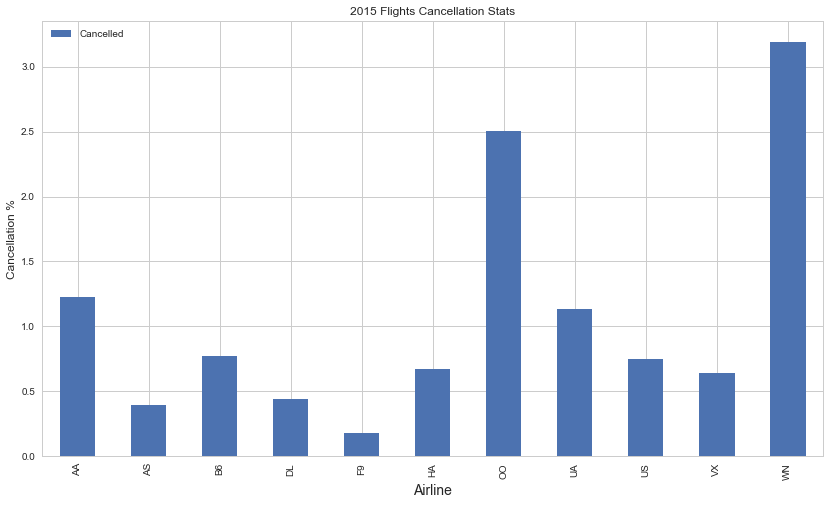

In [34]:
canelationsByCarrier = (df.groupby(['UniqueCarrier']))['UniqueCarrier','Cancelled'].mean()*100
ax = canelationsByCarrier.plot(figsize=(14,8),kind='bar', title ="2015 Flights Cancellation Stats")
ax.set_xlabel("Airline", fontsize=14)
ax.set_ylabel("Cancellation %", fontsize=12)
plt.show()

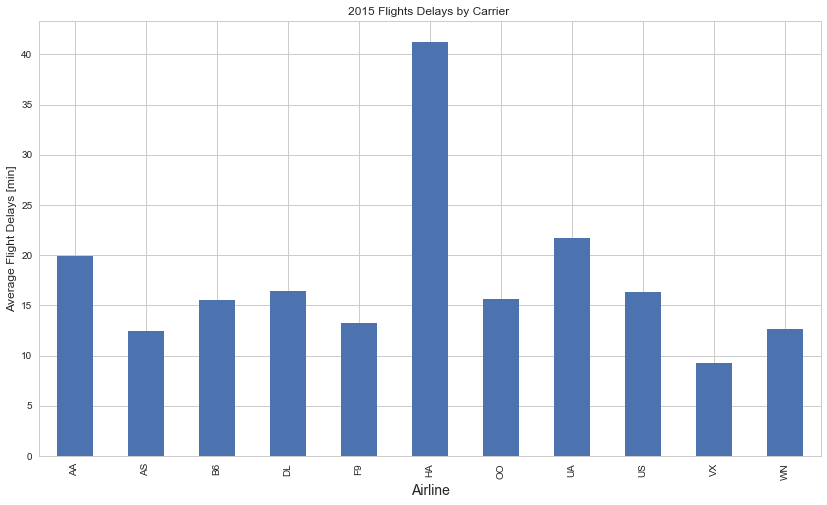

In [35]:
delaysByCarrier = (df.groupby(['UniqueCarrier']))['UniqueCarrier','CarrierDelay'].mean()
ax = delaysByCarrier.plot(figsize=(14,8),kind='bar', title ="2015 Flights Delays by Carrier ",
                          legend=False)
ax.set_xlabel("Airline", fontsize=14)
ax.set_ylabel("Average Flight Delays [min]", fontsize=12)
plt.show()